# Классификация adware

## 0. Описание задачи
У нас есть датасет с различными данными о сетевом трафике. Требуется по этим данным определить тип adware: это может быть одна из 5 вредоносных программ, либо же adware может быть безвредной (benign)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

## 1. Чтение данных

In [2]:
url = './data/Adware_Multiclass_Classification.csv'
data_raw = pd.read_csv(url)

In [3]:
data_raw.shape

(276095, 86)

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276095 entries, 0 to 276094
Data columns (total 86 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   276095 non-null  int64  
 1   Flow ID                      276095 non-null  object 
 2   Source IP                    276095 non-null  object 
 3   Source Port                  276095 non-null  int64  
 4   Destination IP               276095 non-null  object 
 5   Destination Port             276095 non-null  int64  
 6   Protocol                     276095 non-null  int64  
 7   Timestamp                    276095 non-null  object 
 8   Flow Duration                276095 non-null  int64  
 9   Total Fwd Packets            276095 non-null  int64  
 10  Total Backward Packets       276095 non-null  int64  
 11  Total Length of Fwd Packets  276095 non-null  float64
 12  Total Length of Bwd Packets  276095 non-null  float64
 13 

In [5]:
data_raw.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,172.217.6.237-10.42.0.42-443-35084-6,172.217.6.237,443,10.42.0.42,35084,6,02/07/2017 06:19:46,8457,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,1,205.204.101.182-10.42.0.211-443-36459-6,205.204.101.182,443,10.42.0.211,36459,6,14/06/2017 02:35:03,10449,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_MOBIDASH
2,2,182.22.25.124-10.42.0.211-443-38105-6,10.42.0.211,38105,182.22.25.124,443,6,14/06/2017 08:05:54,2634535,3,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_MOBIDASH
3,3,131.253.61.68-10.42.0.151-443-33915-6,10.42.0.151,33915,131.253.61.68,443,6,05/07/2017 11:09:46,4480,3,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,4,172.217.2.174-10.42.0.151-443-38069-6,172.217.2.174,443,10.42.0.151,38069,6,13/06/2017 06:26:02,65297,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_EWIND


In [6]:
data_raw.tail()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
276090,276090,10.42.0.211-10.42.0.1-1556-53-17,10.42.0.211,1556,10.42.0.1,53,17,14/06/2017 12:21:54,51314,1,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_MOBIDASH
276091,276091,239.255.255.250-10.42.0.1-1900-49154-17,10.42.0.1,49154,239.255.255.250,1900,17,13/06/2017 04:28:19,3004127,4,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_KEMOGE
276092,276092,10.42.0.151-10.42.0.1-1149-53-17,10.42.0.151,1149,10.42.0.1,53,17,13/06/2017 06:29:29,141060,1,...,20,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_EWIND
276093,276093,156.154.200.36-10.42.0.211-443-51191-6,10.42.0.211,51191,156.154.200.36,443,6,14/06/2017 05:18:47,460889,9,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_MOBIDASH
276094,276094,169.53.71.244-10.42.0.211-443-48404-6,10.42.0.211,48404,169.53.71.244,443,6,05/07/2017 06:28:38,110068708,16,...,32,1632979.0,2.125491e+06,3135928.0,130030.0,53341039.0,5.259243e+07,90529503.0,16152575.0,BENIGN


Сразу уберём Unnamed столбец, так как это просто порядковый номер записи

In [7]:
data = data_raw.drop(columns = ['Unnamed: 0'])

## 2. Визуализация
Так как признаков очень много, возьму лишь некоторые из них

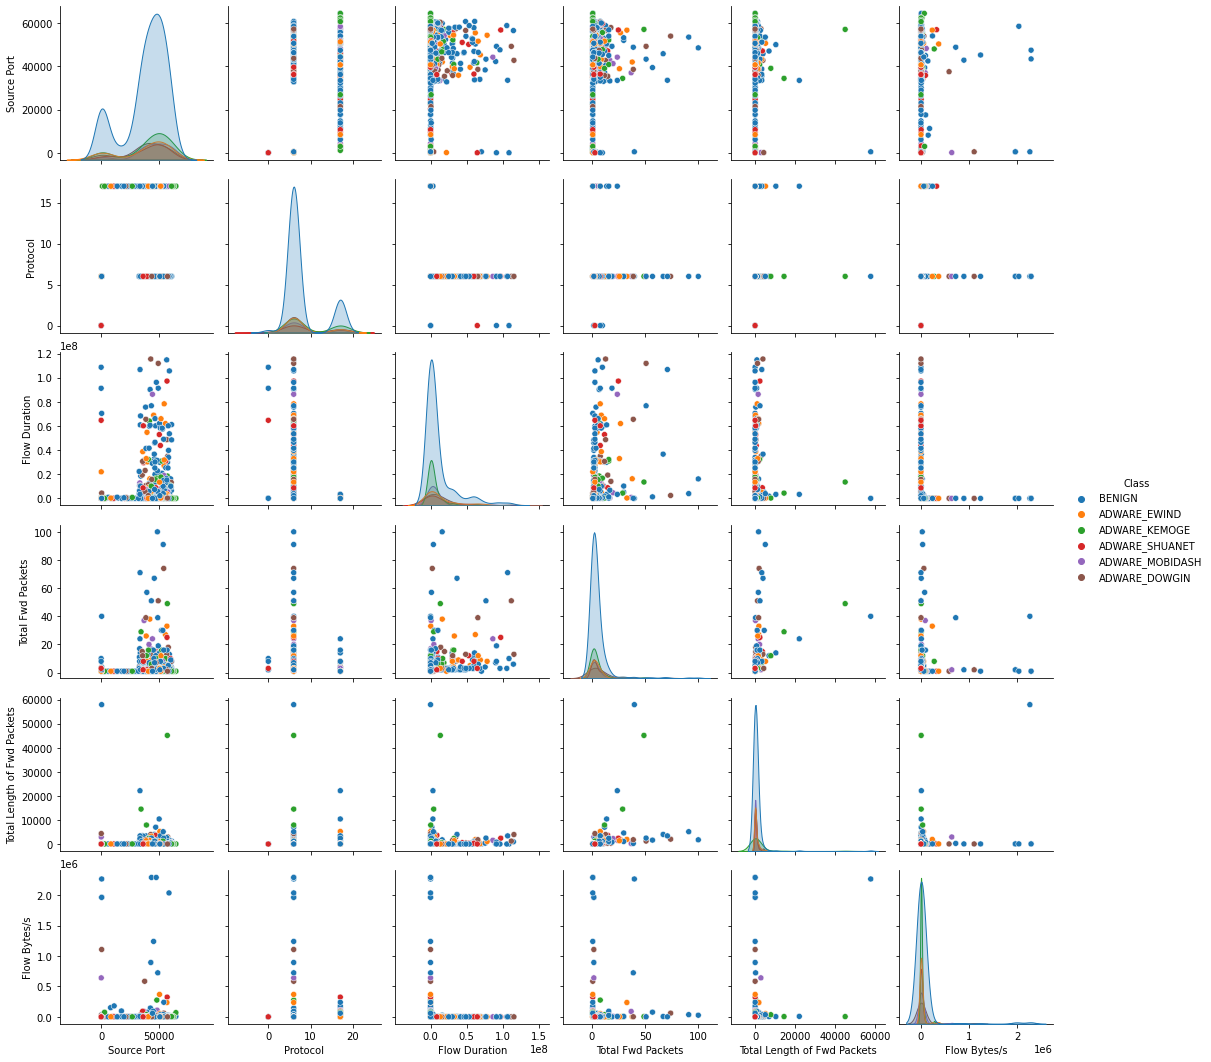

In [8]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=500)
cols = ['Source Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Length of Fwd Packets', 'Flow Bytes/s', 'Class']
sns.pairplot(data.iloc[random_subset][cols], hue='Class', diag_kind='auto')

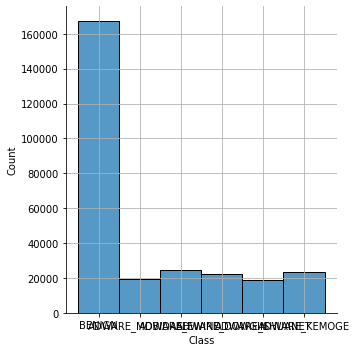

In [9]:
sns.displot(data['Class'], bins = 6)
plt.grid()

Видно, что класс Benign встречается гораздо чаще остальных

### Матрица корреляций

In [10]:
corr_mat = data.corr()
corr_mat

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Source Port,1.000000,-0.686046,-0.109971,0.113537,0.054288,0.030070,0.017468,0.024855,0.193427,-0.108955,...,0.051456,-0.000705,0.057516,0.004153,0.050052,0.060026,0.049660,-0.001862,0.046826,0.051646
Destination Port,-0.686046,1.000000,-0.164606,-0.128250,-0.041856,-0.024276,-0.009794,-0.021122,-0.139877,0.084757,...,-0.035418,0.001492,-0.039429,-0.007082,-0.035367,-0.040086,-0.055198,-0.020485,-0.055639,-0.053493
Protocol,-0.109971,-0.164606,1.000000,-0.277954,-0.054772,-0.029989,-0.002687,-0.025784,-0.074424,0.246987,...,0.007205,-0.007803,-0.079507,-0.024170,-0.075257,-0.077523,-0.152551,-0.070860,-0.157148,-0.145101
Flow Duration,0.113537,-0.128250,-0.277954,1.000000,0.101657,0.052341,0.025452,0.038373,0.172708,-0.097782,...,0.104221,0.000750,0.327131,0.238187,0.355201,0.275385,0.718788,0.367790,0.747184,0.678836
Total Fwd Packets,0.054288,-0.041856,-0.054772,0.101657,1.000000,0.880066,0.258894,0.866502,0.176154,-0.021082,...,0.415239,-0.007918,0.146373,0.102871,0.154292,0.125034,0.080477,0.052014,0.085366,0.074654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,0.060026,-0.040086,-0.077523,0.275385,0.125034,0.080905,0.037110,0.069509,0.160900,-0.026569,...,0.126519,-0.001348,0.963003,0.061886,0.843122,1.000000,0.358888,0.075695,0.356471,0.355361
Idle Mean,0.049660,-0.055198,-0.152551,0.718788,0.080477,0.038801,0.021219,0.025296,0.200657,-0.053561,...,0.090723,-0.000614,0.364982,0.096779,0.339555,0.358888,1.000000,0.218952,0.989692,0.990065
Idle Std,-0.001862,-0.020485,-0.070860,0.367790,0.052014,0.024433,0.019817,0.015392,0.091409,-0.019083,...,0.070609,0.000446,0.162235,0.344028,0.233702,0.075695,0.218952,1.000000,0.351527,0.081594
Idle Max,0.046826,-0.055639,-0.157148,0.747184,0.085366,0.040808,0.023255,0.026320,0.204899,-0.054032,...,0.099371,-0.000519,0.377256,0.150521,0.366090,0.356471,0.989692,0.351527,1.000000,0.960490


<AxesSubplot:>

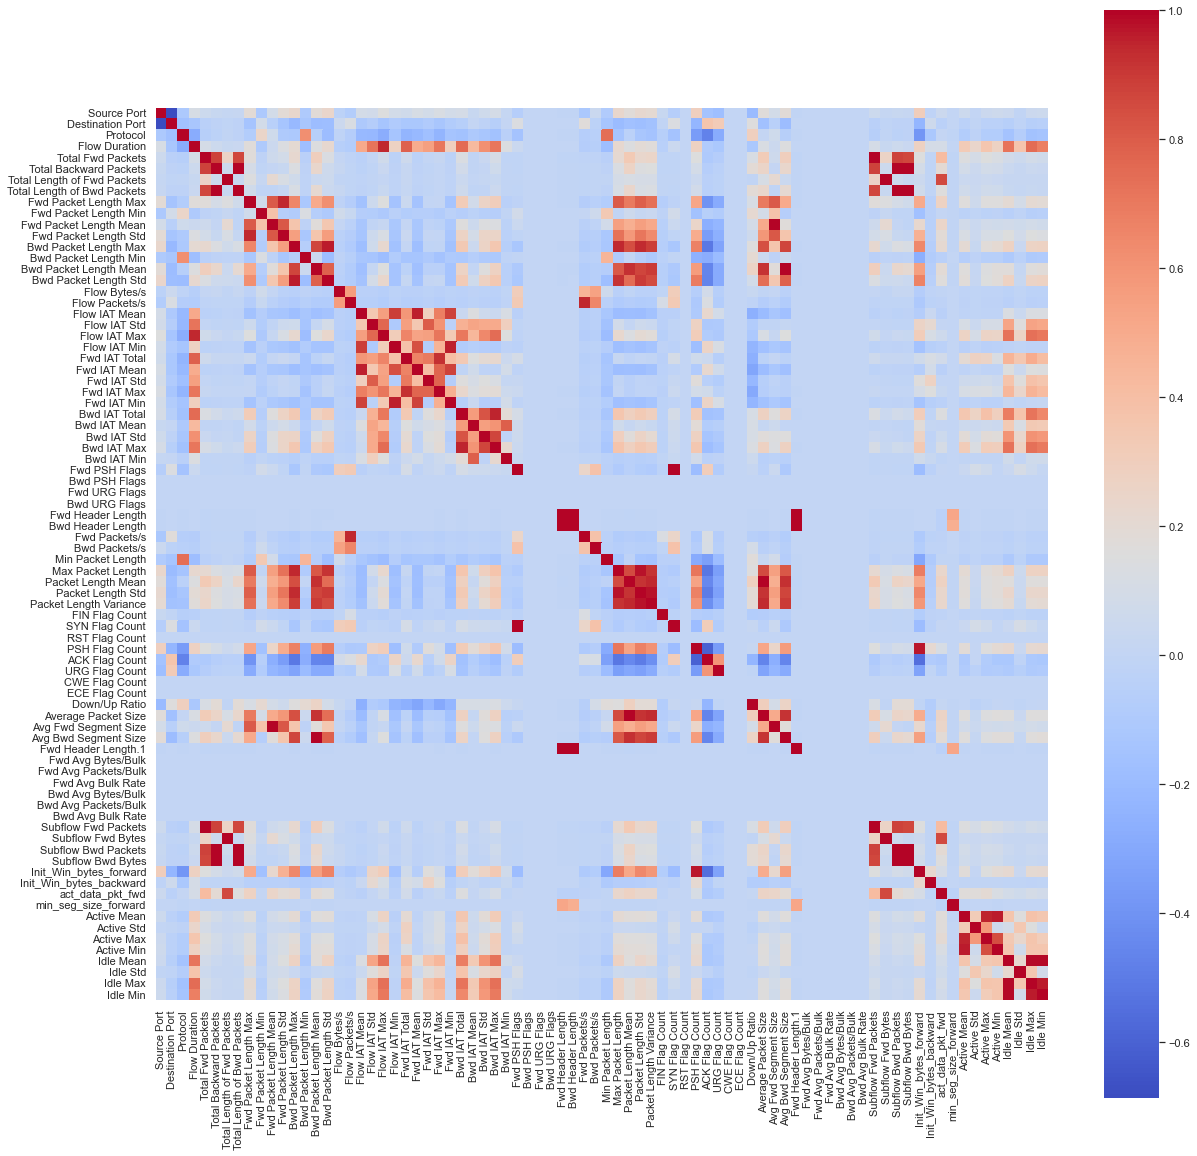

In [11]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(corr_mat.fillna(0.0), square=True, cmap='coolwarm')

In [12]:
corr_mat > 0.9

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Source Port,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Destination Port,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Protocol,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Flow Duration,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Total Fwd Packets,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
Idle Mean,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
Idle Std,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
Idle Max,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True


In [13]:
corr_mat.where(np.triu(corr_mat > 0.9, k=1)).stack().sort_values(ascending=False)

Fwd Header Length            Fwd Header Length.1            1.000000
Total Backward Packets       Subflow Bwd Packets            1.000000
Total Length of Fwd Packets  Subflow Fwd Bytes              1.000000
Total Length of Bwd Packets  Subflow Bwd Bytes              1.000000
Fwd Packet Length Mean       Avg Fwd Segment Size           1.000000
Total Fwd Packets            Subflow Fwd Packets            1.000000
Fwd PSH Flags                SYN Flag Count                 1.000000
Bwd Packet Length Mean       Avg Bwd Segment Size           1.000000
Total Length of Bwd Packets  Subflow Bwd Packets            0.998575
Subflow Bwd Packets          Subflow Bwd Bytes              0.998575
Total Backward Packets       Total Length of Bwd Packets    0.998575
                             Subflow Bwd Bytes              0.998575
Fwd Header Length            Bwd Header Length              0.998284
Bwd Header Length            Fwd Header Length.1            0.998284
Packet Length Mean           Avera

## 3. Обработка пропущенных значений

In [14]:
na_data = data.isna().sum()
na_data

Flow ID             0
Source IP           0
Source Port         0
Destination IP      0
Destination Port    0
                   ..
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
Class               0
Length: 85, dtype: int64

In [15]:
na_data.sum()

0

Пропущенных значений нет

## 4. Обработка категориальных признаков

In [16]:
cat_cols = [col for col in data.columns if data[col].dtype.name == "object" and col != 'Class']
cat_cols

['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']

In [17]:
from sklearn import preprocessing
for col_name in cat_cols:
    data[col_name] = preprocessing.LabelEncoder().fit_transform(data[col_name])
data

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,116845,617,443,10,35084,6,8845,8457,1,3,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
1,142840,987,443,8,36459,6,44390,10449,2,1,...,20,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_MOBIDASH
2,128491,4,38105,1392,443,6,51906,2634535,3,0,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_MOBIDASH
3,91744,3,33915,481,443,6,33070,4480,3,0,...,20,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,112784,573,443,7,38069,6,38950,65297,1,1,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_EWIND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276090,41403,4,1556,6,53,17,54716,51314,1,1,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_MOBIDASH
276091,149086,2,49154,2196,1900,17,36845,3004127,4,0,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_KEMOGE
276092,23849,3,1149,6,53,17,39099,141060,1,1,...,20,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_EWIND
276093,93787,4,51191,578,443,6,47167,460889,9,10,...,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,ADWARE_MOBIDASH


Используем labelEncoder так как уникальных значений у этих признаков слишком много

In [18]:
class_arr = data['Class'].unique()
print(class_arr)

['BENIGN' 'ADWARE_MOBIDASH' 'ADWARE_EWIND' 'ADWARE_DOWGIN'
 'ADWARE_SHUANET' 'ADWARE_KEMOGE']


In [19]:
i = 0
for class_name in class_arr:
    data.at[data['Class'] == class_name, 'Class'] = i
    i+= 1
print(data['Class'].unique())

[0 1 2 3 4 5]


Закодировали классы целыми числами от 0 до 5
- 0 - Benign
- 1 - ADWARE_MOBIDASH
- 2 - ADWARE_EWIND
- 3 - ADWARE_DOWGIN
- 4 - ADWARE_SHUANET
- 5 - ADWARE_KEMOGE

## 5. Нормализация

In [20]:
data_stand = data.drop(columns = ['Class'])
data_stand = data_stand.astype('float64')
data_stand.describe()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,276095.000000,276095.000000,276095.000000,276095.000000,276095.000000,276095.000000,276095.000000,2.760950e+05,276095.000000,276095.000000,...,276095.000000,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05
mean,81407.257397,103.013970,38956.497763,963.255872,5467.306688,8.461511,30130.720535,1.081044e+07,6.775211,10.012659,...,1.645452,-2.523693e+04,1.330748e+05,1.910040e+04,1.517145e+05,1.183610e+05,3.883987e+06,2.795727e+05,4.126309e+06,3.665575e+06
std,41093.202864,345.588432,18367.120729,1042.370033,14771.412851,4.656345,16748.362039,2.151609e+07,39.356488,121.748188,...,10.491204,5.936716e+06,7.695242e+05,2.714005e+05,8.983619e+05,7.271824e+05,1.438763e+07,2.667350e+06,1.501760e+07,1.408056e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000,...,0.000000,-1.395063e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,50358.000000,4.000000,34123.500000,10.000000,80.000000,6.000000,15217.000000,4.921300e+04,1.000000,0.000000,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,82322.000000,5.000000,43399.000000,596.000000,443.000000,6.000000,31327.000000,5.164570e+05,2.000000,1.000000,...,0.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,116935.000000,5.000000,52573.000000,1633.000000,443.000000,6.000000,44751.500000,1.062121e+07,5.000000,4.000000,...,1.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,149865.000000,2126.000000,65534.000000,3742.000000,65165.000000,17.000000,58472.000000,1.199991e+08,8421.000000,13540.000000,...,3954.000000,6.000000e+01,4.320783e+07,3.147178e+07,6.778153e+07,4.320783e+07,1.197947e+08,7.370595e+07,1.197947e+08,1.197947e+08


Видим, что разброс очень большой. Нужна нормализация

In [21]:
data_stand = (data_stand - data_stand.mean(axis = 0)) / data_stand.std(axis = 0)
data_stand = data_stand.fillna(0.0)
data_stand.describe()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,...,2.760950e+05,276095.000000,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05,2.760950e+05
mean,-3.353328e-17,-4.632380e-18,5.659224e-17,-5.291207e-17,-2.675199e-17,1.117948e-16,9.554284e-17,-1.626480e-17,-1.544127e-19,-3.911787e-18,...,2.089718e-17,0.000000,4.323555e-18,3.047077e-17,-1.919864e-17,2.316190e-17,-8.997111e-17,-3.808846e-18,4.005722e-17,-5.354259e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.981039e+00,-2.980828e-01,-2.120991e+00,-9.241017e-01,-3.701275e-01,-1.817200e+00,-1.799025e+00,-5.024352e-01,-1.467410e-01,-8.224072e-02,...,-1.568411e-01,-234.984748,-1.729312e-01,-7.037717e-02,-1.688790e-01,-1.627666e-01,-2.699532e-01,-1.048129e-01,-2.747648e-01,-2.603288e-01
25%,-7.555813e-01,-2.865083e-01,-2.631331e-01,-9.145081e-01,-3.647117e-01,-5.286360e-01,-8.904585e-01,-5.001480e-01,-1.467410e-01,-8.224072e-02,...,-1.568411e-01,0.004254,-1.729312e-01,-7.037717e-02,-1.688790e-01,-1.627666e-01,-2.699532e-01,-1.048129e-01,-2.747648e-01,-2.603288e-01
50%,2.226019e-02,-2.836147e-01,2.418725e-01,-3.523277e-01,-3.401372e-01,-5.286360e-01,7.142665e-02,-4.784320e-01,-1.213323e-01,-7.402705e-02,...,-1.568411e-01,0.004256,-1.729312e-01,-7.037717e-02,-1.688790e-01,-1.627666e-01,-2.699532e-01,-1.048129e-01,-2.747648e-01,-2.603288e-01
75%,8.645649e-01,-2.836147e-01,7.413520e-01,6.425205e-01,-3.401372e-01,-5.286360e-01,8.729677e-01,-8.795031e-03,-4.510594e-02,-4.938602e-02,...,-6.152313e-02,0.004256,-1.729312e-01,-7.037717e-02,-1.688790e-01,-1.627666e-01,-2.699532e-01,-1.048129e-01,-2.747648e-01,-2.603288e-01
max,1.665914e+00,5.853743e+00,1.447015e+00,2.665794e+00,4.041434e+00,1.833732e+00,1.692182e+00,5.074746e+00,2.137951e+02,1.111309e+02,...,3.767303e+02,0.004261,5.597583e+01,1.158903e+02,7.528126e+01,5.925538e+01,8.056275e+00,2.752783e+01,7.702189e+00,8.247482e+00


## 6. Разбитие выборки

In [22]:
X = data_stand
y = data['Class']

X = X.to_numpy()
y = np.array(y, dtype = 'int')

X.shape, y.shape

((276095, 84), (276095,))

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(207071, 69024)

## 7. KNN
Для начала возьмем число соседей равное 4

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 4)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

#### Ошибка на тестовой выборке

In [25]:
y_test_predict  = knn_model.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.1375173852573018

#### Ошибка на тренировочной выборке

In [26]:
y_train_predict = knn_model.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train

0.08066315418383067

In [27]:
print(sklearn.metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     41733
           1       0.52      0.62      0.56      4929
           2       0.75      0.78      0.77      6138
           3       0.66      0.60      0.63      5742
           4       0.77      0.64      0.70      4718
           5       0.86      0.74      0.79      5764

    accuracy                           0.86     69024
   macro avg       0.75      0.73      0.74     69024
weighted avg       0.86      0.86      0.86     69024



### 8 соседей

In [28]:
knn_model = KNeighborsClassifier(n_neighbors = 8)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

#### Ошибка на тестовой выборке

In [29]:
y_test_predict  = knn_model.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.14860048678720444

#### Ошибка на тренировочной выборке

In [30]:
y_train_predict = knn_model.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train

0.10759594535207731

In [31]:
print(sklearn.metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     41733
           1       0.51      0.58      0.54      4929
           2       0.73      0.75      0.74      6138
           3       0.63      0.61      0.62      5742
           4       0.74      0.61      0.67      4718
           5       0.85      0.73      0.78      5764

    accuracy                           0.85     69024
   macro avg       0.74      0.71      0.72     69024
weighted avg       0.85      0.85      0.85     69024



## Random Forest

In [33]:
from sklearn import ensemble
rf_model = ensemble.RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

#### Ошибка на тестовой выборке

In [34]:
y_test_predict  = rf_model.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.034263444598980064

#### Ошибка на тренировочной выборке

In [35]:
y_train_predict = rf_model.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train

0.0

In [36]:
print(sklearn.metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41733
           1       0.78      0.76      0.77      4929
           2       1.00      0.98      0.99      6138
           3       0.81      0.82      0.82      5742
           4       0.98      0.99      0.99      4718
           5       0.98      1.00      0.99      5764

    accuracy                           0.97     69024
   macro avg       0.93      0.93      0.93     69024
weighted avg       0.97      0.97      0.97     69024



## Gradient Boosting

In [37]:
gb_model = ensemble.GradientBoostingClassifier(n_estimators = 100)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

#### Ошибка на тестовой выборке

In [38]:
y_test_predict  = gb_model.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.017588085303662494

#### Ошибка на тренировочной выборке

In [39]:
y_train_predict = gb_model.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train

0.01589792872975936

In [40]:
print(sklearn.metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41733
           1       0.91      0.84      0.87      4929
           2       1.00      1.00      1.00      6138
           3       0.88      0.93      0.90      5742
           4       1.00      1.00      1.00      4718
           5       0.99      1.00      1.00      5764

    accuracy                           0.98     69024
   macro avg       0.96      0.96      0.96     69024
weighted avg       0.98      0.98      0.98     69024



Видно, что KNN справился хуже всех. При этом алгоритм показывает себя лучше при меньшем количестве соседей. Random Forest и Gradient Boosting дают ощутимый прирост в accuracy по сравнению с KNN